In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import pandas as pd
from matplotlib import pyplot as plt
import os
import cv2
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,GlobalAveragePooling2D
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Define the paths to your image and csv folders
train_val_dir = 'C://Users//sayan//Downloads//charts//charts//train_val'
test_dir = ''
train_path_labels = 'C://Users//sayan//Downloads//charts//charts//train_val.csv'
train_val_labels = pd.read_csv(train_path_labels)

In [ ]:
images = []
labels = []
for filename in os.listdir(train_val_dir):
    print (filename)
    if filename.endswith('.png'):
 # Loading the images and resizing them into (128, 128) with 3 color channels
        img = cv2.imread(os.path.join(train_val_dir, filename))
        img = cv2.resize(img, (128, 128))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_array = np.array(img)
          # Appending the array to the list of images
        images.append(img_array)
        labels.append(filename)
          # Converting the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)

# Converting the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)
# Saving the arrays in NumPy format
np.save('x_train.npy', images)
np.save('y_train.npy', labels)
x_train = np.load('x_train.npy') 
y_train = np.load('y_train.npy')

0.png
1.png
10.png
100.png
101.png
102.png
103.png
104.png
105.png
106.png
107.png
108.png
109.png
11.png
110.png
111.png
112.png
113.png
114.png
115.png
116.png
117.png
118.png
119.png
12.png
120.png
121.png
122.png
123.png
124.png
125.png
126.png
127.png
128.png
129.png
13.png
130.png
131.png
132.png
133.png
134.png
135.png
136.png
137.png
138.png
139.png
14.png
140.png
141.png
142.png
143.png
144.png
145.png
146.png
147.png
148.png
149.png
15.png
150.png
151.png
152.png
153.png
154.png
155.png
156.png
157.png
158.png
159.png
16.png
160.png
161.png
162.png
163.png
164.png
165.png
166.png
167.png
168.png
169.png
17.png
170.png
171.png
172.png
173.png
174.png
175.png
176.png
177.png
178.png
179.png
18.png
180.png
181.png
182.png
183.png
184.png
185.png
186.png
187.png
188.png
189.png
19.png
190.png
191.png
192.png
193.png
194.png
195.png
196.png
197.png
198.png
199.png
2.png
20.png
200.png
201.png
202.png
203.png
204.png
205.png
206.png
207.png
208.png
209.png
21.png
210.png
211.png
21

In [ ]:
x_train.shape #Gives the no. of images, pixel x pixel and the colour channels

(1000, 128, 128, 3)

In [ ]:
x_train[:5] #training data after conversion to arrays

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
        

In [ ]:
y_train #labels

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

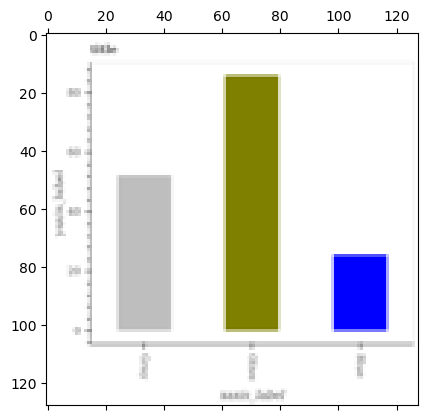

In [ ]:
plt.matshow(x_train[1]) #checking whether the correct data is getting fetched using matshow function

In [ ]:
# load test dataset in numpy array
images = [] #defining image array
labels = [] #defining labels array
for filename in os.listdir(test_dir):
    if filename.endswith('.png'): #checking whether the images are in .png format
    # Load the images and resize them to (128, 128) with 3 color channels
        img = cv2.imread(os.path.join(test_dir, filename)) #imread function to read the images
        img = cv2.resize(img, (128, 128)) #rezing the images in 128x128 pixels
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_array = np.array(img)
          # Append the array to the list of images
        images.append(img_array) #appending the images
        labels.append(filename) #appending the labels
# Convert the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)

In [ ]:
# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)
# Save the arrays in NumPy format
np.save('x_test.npy', images)
np.save('y_test.npy', labels)
x_test = np.load('x_test.npy') 
y_test = np.load('y_test.npy')

In [ ]:
x_test.shape

(50, 128, 128, 3)

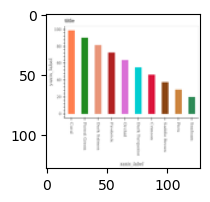

In [ ]:
# checking the images loaded for our testing purpose
plt.figure(figsize = (10,2))
plt.imshow(x_train[10])


In [ ]:
# defining classes from the images observed
image_classes = ['line', 'dot_line', 'hbar_categorical', 'vbar_categorical', 'pie']
image_classes[0]
#mapping the categories to the labels array
label_map = {'line': 0, 'dot_line': 1, 'hbar_categorical': 2, 'vbar_categorical': 3, 'pie': 4}
y_train = np.array([label_map[label] for label in train_val_labels['type']])
y_train #printing to check the mapping for testing

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
y_train.shape

(1000,)

In [ ]:
y_test.shape

(50,)

In [ ]:
#Mapping the lables from csv to the images
#function to test the chart sample
def image_sample(x, y, index):
    plt.figure(figsize = (10,2))
    plt.imshow(x[index])
    plt.xlabel(image_classes[y[index]])

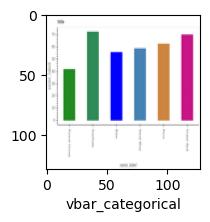

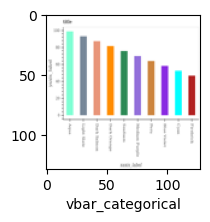

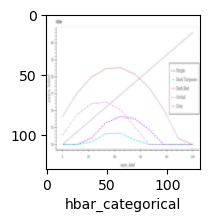

In [ ]:
#checking for the testing purpose
image_sample(x_train,y_train,0)
image_sample(x_train,y_train,208)
image_sample(x_train,y_train,444)

In [ ]:
#Mapping for the corresponding labels to the image is done
# normalize the image
x_train=x_train /255
x_test=x_train /255

x_test.shape

(1000, 128, 128, 3)

In [ ]:
# take the label for train data from csv file
y_train_index = train_val_labels['image_index']
y_train_type = train_val_labels['type']

y_train_type[:5]

0    vbar_categorical
1    vbar_categorical
2    vbar_categorical
3    vbar_categorical
4    vbar_categorical
Name: type, dtype: object

In [ ]:
# writing a simple NN for testing
# Defining the model architecture
model = Sequential([
 Flatten(input_shape=(128,128,3)),
 Dense(3000, activation='relu'),
 Dense(1000, activation='relu'),
 Dense(5, activation='softmax')
])


In [ ]:
# Compiling the model
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy']) #using the Stochastic Gradient Descent
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
32/32 [==============================] - 26s 287ms/step - loss: 11.3498 - accuracy: 0.2080
Epoch 2/5
32/32 [==============================] - 9s 278ms/step - loss: 1.6219 - accuracy: 0.2400
Epoch 3/5
32/32 [==============================] - 10s 299ms/step - loss: 1.6639 - accuracy: 0.2220
Epoch 4/5
32/32 [==============================] - 9s 282ms/step - loss: 1.6273 - accuracy: 0.2470
Epoch 5/5
32/32 [==============================] - 9s 279ms/step - loss: 1.7571 - accuracy: 0.1860


In [ ]:
# Spliting the training images and labels into training and validation sets
from sklearn.model_selection import train_test_split #using sklearn lib to split the datas
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

model.evaluate(x_test,y_test)

y_pred = model.predict(x_test)
y_pred
y_pred_classes = [np.argmax(ele) for ele in y_pred]

7/7 [==============================] - 1s 87ms/step


In [ ]:
# We see the accuracy is very low and we need to modify our nn to add more layers for better accuracy

# Printing the shapes of the arrays to verify that they loaded correctly
print("Train Images Shape:", x_train.shape)
print("Train Labels Shape:", y_train.shape)
print("Test Images Shape:", x_test.shape)
print("Test Labels Shape:", y_test.shape)

Train Images Shape: (800, 128, 128, 3)
Train Labels Shape: (800,)
Test Images Shape: (200, 128, 128, 3)
Test Labels Shape: (200,)


Epoch 1/10
1/1 [==============================] - 91s 91s/step - loss: 1.6364 - accuracy: 0.1950 - val_loss: 2.7195 - val_accuracy: 0.1650
Epoch 2/10
1/1 [==============================] - 10s 10s/step - loss: 2.5694 - accuracy: 0.2087 - val_loss: 2.3154 - val_accuracy: 0.3100
Epoch 3/10
1/1 [==============================] - 7s 7s/step - loss: 2.3073 - accuracy: 0.3313 - val_loss: 1.9047 - val_accuracy: 0.1850
Epoch 4/10
1/1 [==============================] - 5s 5s/step - loss: 1.9222 - accuracy: 0.2037 - val_loss: 1.6491 - val_accuracy: 0.1850
Epoch 5/10
1/1 [==============================] - 11s 11s/step - loss: 1.6642 - accuracy: 0.2062 - val_loss: 1.5743 - val_accuracy: 0.3450
Epoch 6/10
1/1 [==============================] - 4s 4s/step - loss: 1.5736 - accuracy: 0.3325 - val_loss: 1.6256 - val_accuracy: 0.1650
Epoch 7/10
1/1 [==============================] - 33s 33s/step - loss: 1.6060 - accuracy: 0.2087 - val_loss: 1.6143 - val_accuracy: 0.1650
Epoch 8/10
1/1 [=================

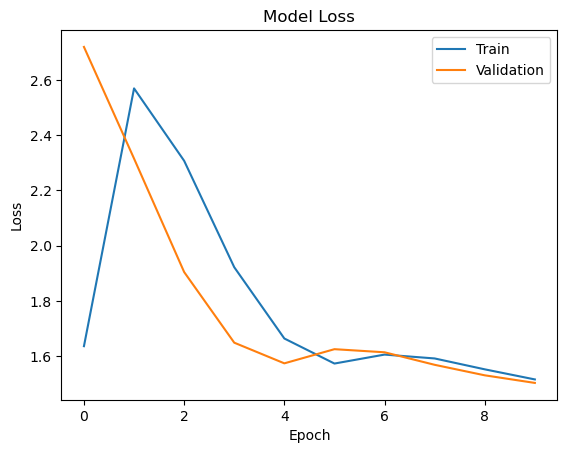

In [ ]:
# Modifying the model architecture to CNN
cnn_model = Sequential([
 Conv2D(filters=16 ,kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
 MaxPooling2D(pool_size=(2,2)),
 Conv2D(32, (3,3), activation='relu'),
 MaxPooling2D(pool_size=(2,2)),
 Conv2D(64, (3,3), activation='relu'),
 MaxPooling2D(pool_size=(2,2)), 
 Flatten(),
 Dense(128, activation='relu'),
 Dense(5, activation='softmax')
])
# Compiling the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = cnn_model.fit(x_train, y_train, batch_size=1000, epochs=10,validation_data=(x_test, y_test))
# Plotting the obtained loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

7/7 [==============================] - 2s 61ms/step


[1, 4, 4, 4, 1]

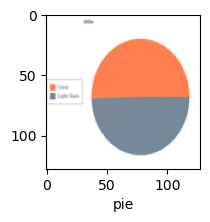

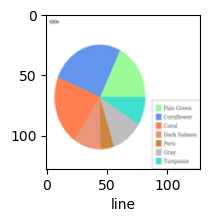

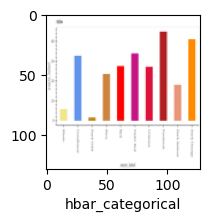

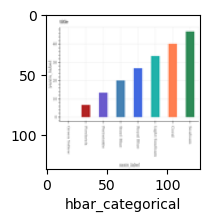

In [ ]:
cnn_model.evaluate(x_test,y_test)

image_sample(x_test,y_test,1)
image_sample(x_test,y_test,50)
image_sample(x_test,y_test,25)
image_sample(x_test,y_test,30)

# Observation: we can see some wrong predictions

y_pred = cnn_model.predict(x_test)
y_pred[:5]

y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

In [ ]:
y_test[:5]

array([0, 4, 4, 4, 0])

C:\Users\debay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\debay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\debay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.31      0.30      0.30        44
           2       0.00      0.00      0.00        48
           3       0.26      0.97      0.41        33
           4       0.77      0.71      0.74        38

    accuracy                           0.36       200
   macro avg       0.27      0.40      0.29       200
weighted avg       0.26      0.36      0.27       200

Confusion Matrix:
[[ 0 21  0 10  6]
 [ 0 13  0 31  0]
 [ 0  7  0 40  1]
 [ 0  0  0 32  1]
 [ 0  1  0 10 27]]


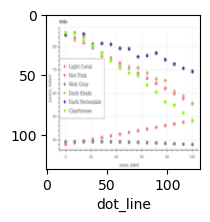

In [ ]:
# here we see some values are not matching

# test actual and predicted
image_sample(x_test,y_test,15) #actual
image_classes[y_classes[15]] #predicted

# some values are not matching
print("classification report: \n", classification_report(y_test,y_classes))

# Generate the confusion matrix 
conf_mat = confusion_matrix(y_test, y_classes)
print('Confusion Matrix:')
print(conf_mat)

58889256/58889256 [==============================] - 9s 0us/step


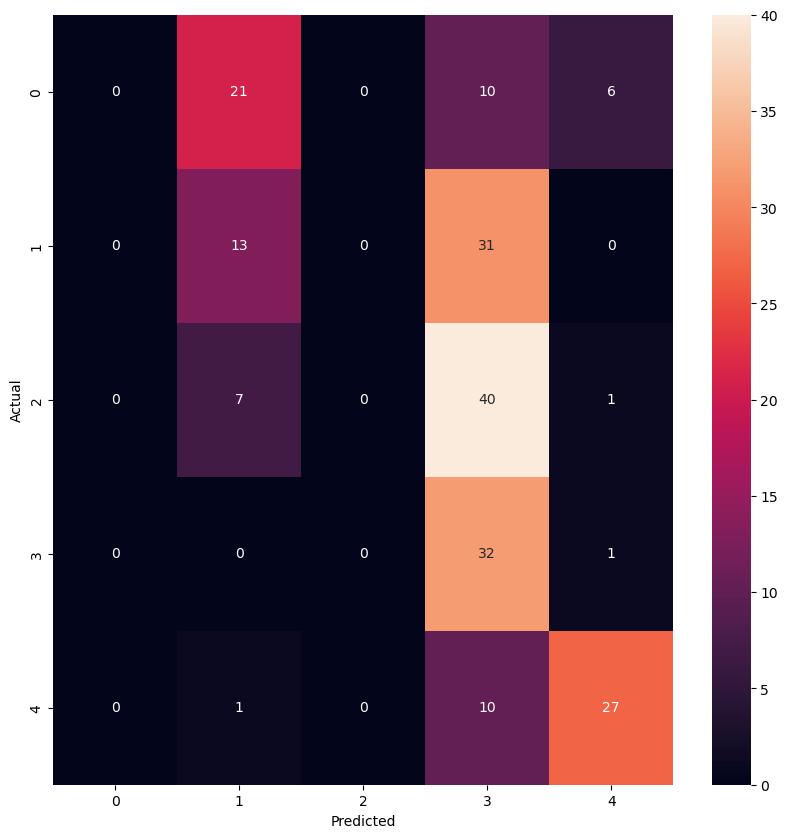

In [ ]:
# Plotting the confusion matrix
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# for 5 iterations, we can see some promising accuracy, more training will be required for better accuracy
# in the confusion matrix, whatever is not in diagonal is a error

from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Load the pre-trained model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Replacing the final classification layer with a new layer
x = vgg16_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)
pt_model = tf.keras.Model(inputs=vgg16_model.input, outputs=predictions)

In [ ]:
# Freezing the weights of all layers except the new classification layer
for layer in pt_model.layers:
     layer.trainable = False

# Compiling the model with categorical crossentropy loss and Adam optimizer
pt_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Printing the summary of the model architecture
pt_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
##############TASK-3 = Finetune for a pretrained network.###########

In [ ]:
from keras.applications import VGG16
from keras.layers import Dense, Dropout, Flatten
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Setting the input size of the images
img_width, img_height = 224, 224

In [ ]:
# Setting the directories of the training and validation data
train_data_dir = "C://Users//sayan//Downloads//charts//charts//train_val"
val_data_dir = "C://Users//sayan//Downloads//charts//charts//train_val"

In [ ]:
# Creating an instance of the VGG16 model with pre-trained weights
basemodel = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

In [ ]:
# Freezing the layers of the pre-trained model
for layer in basemodel.layers:
    layer.trainable = False

In [ ]:
# Adding new layers to the pre-trained model
x = basemodel.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

In [ ]:
# Defining the new model with the pre-trained model as its base and the new layers as its top
model = Model(inputs=basemodel.input, outputs=predictions)

In [ ]:
# Compiling the model with a binary crossentropy loss and an Adam optimizer
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-5), metrics=['accuracy'])

In [ ]:
# Setting up data augmentation for the training data and validation data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Setting the batch size
batch_size = 16

# Setting the number of training and validation samples
nb_train_samples = 1600
nb_val_samples = 400

# Setting the number of epochs
epochs = 10

In [ ]:
# Training the model with the data generators
history = model.fit(
    train_datagen.flow_from_directory(train_data_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='binary'),
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=val_datagen.flow_from_directory(val_data_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='binary'),
    validation_steps=nb_val_samples // batch_size)

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


ValueError: Asked to retrieve element 0, but the Sequence has length 0

In [ ]:
# Evaluating the model on the test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_data_dir ="C://Users//sayan//Downloads//charts//charts//test"

In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 0 images belonging to 0 classes.


In [ ]:
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))

ValueError: Asked to retrieve element 0, but the Sequence has length 0

In [ ]:
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

NameError: name 'test_acc' is not defined